This notebook fits models at each stadium and collectivizes the results on a single chart.

In [16]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import patsy
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [3]:
def add_better_model(row):
    if row['better_model'] > 0:
        return row['better_model']
    if row.name in df2.index:
        return df2.loc[row.name, 'better_model']
    else:
        return np.nan

In [4]:
for stadium in df['match_stadium'].unique():
    df2 = df[df['match_stadium'] == stadium].loc[:,['mean_attendance_delta_normalized', 'home_prior_leaguerank', 'away_prior_leaguerank',
            'home_last3_goals', 'home_last3_poss', 'away_last3_poss', 'away_distance', 'season_num', 'att_std', 'match_attendance', 'stupid_model']]
    df2.dropna(how='any', inplace=True)
    y = df2['mean_attendance_delta_normalized']
    if len(df2) < 10:
        continue
    X = df2.iloc[:,1:7]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    model = sm.OLS(y, X_scaled)
    res = model.fit()
    ypred = res.predict(X_scaled)
    df2['better_model'] = df2['stupid_model'] + np.multiply(ypred, df2['att_std'])
    df['better_model'] = df.apply(add_better_model, axis=1)

In [5]:
df['better_model'] = df.apply(add_better_model, axis=1)

In [6]:
df4 = df[df['better_model'] > 0]

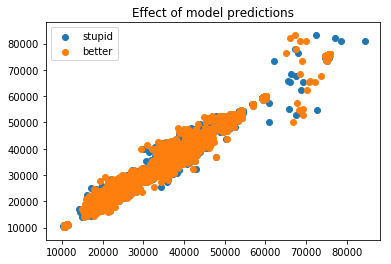

In [10]:
plt.scatter(df4['better_model'], df4['match_attendance'], label = 'stupid')
plt.scatter(df4['stupid_model'], df4['match_attendance'], label = 'better')
plt.title('Effect of model predictions')
plt.legend()

In [11]:
import seaborn as sns

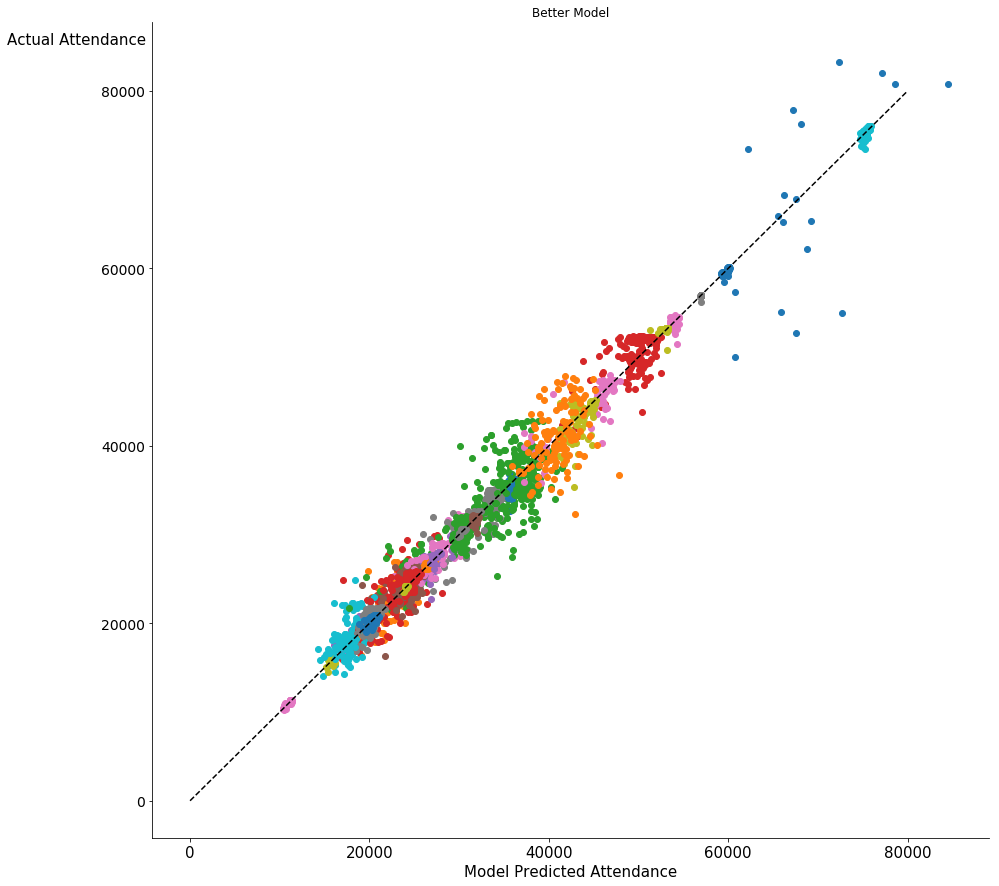

In [12]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
ax.plot(np.arange(1,80000),np.arange(1,80000), color='black', ls='dashed')
for team in df['hometeam_name'].unique():
    ax.scatter(df[df['hometeam_name']==team]['better_model'], df[df['hometeam_name']==team]['match_attendance'], label=team)

sns.despine()
plt.title('Better Model')
plt.xticks(np.arange(0,100000, 20000), size = 15)
plt.yticks(np.arange(0,100000, 20000), size = 14)
plt.ylabel('Actual Attendance', rotation=0, size = 15)
plt.xlabel('Model Predicted Attendance', size = 15)
ax.yaxis.set_label_coords(-0.09, 0.97)
plt.savefig('testfig.png')

<h1>**Show difference in mean error between better model and stupid model**</h1>

In [17]:
sqrt(np.mean((df['better_model']-df['match_attendance'])**2))

1617.4518935631042

In [18]:
from math import sqrt as sqrt
sqrt(np.mean((df['stupid_model']-df['match_attendance'])**2))

1828.5442900119585

In [19]:
df3 = df[df['match_stadium'] == 'Stadium of Light, Sunderland']

In [20]:
sqrt(np.mean((df3['better_model']-df3['match_attendance'])**2))

3179.324457455951

In [21]:
sqrt(np.mean((df3['stupid_model'] - df3['match_attendance'])**2))

3414.570781662942

Text(0.5,1,'Residual Plot')

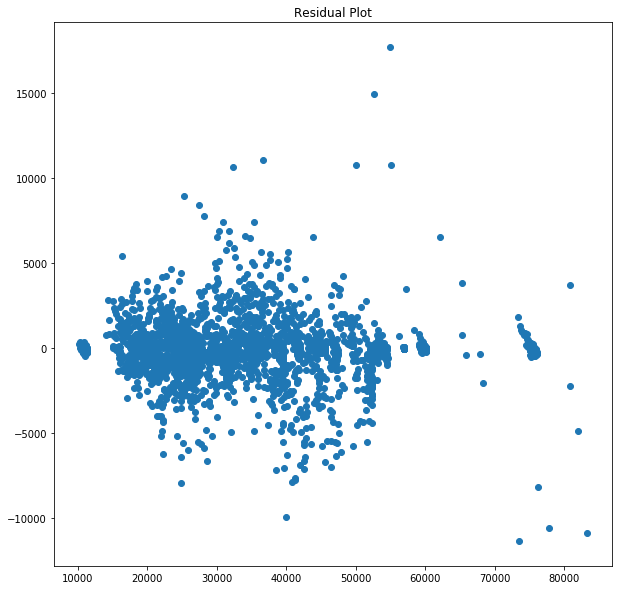

In [22]:
plt.figure(figsize=[10,10])
plt.scatter(df['match_attendance'] ,df['better_model'] - df['match_attendance'])
plt.title('Residual Plot')